In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dill

### 3 Results

#### 3.1 Comparative analysis of linear, exponential and greedy optimal sensor placements for borehole thermometry

##### Figure 2. Performance comparison of linear, exponential, and greedy optimal sensor placements in case of EDML, assuming no device error.

<u>Steps to reproduce plot:</u><br>
Run 'Sensor placements/code/EDML_varying_sensors_5_20_err00.py'. <br>
Note: Step by step explanation is shown in 'Sensor placements/Sensor placement using greedy optimal sampling.ipynb'.

In [2]:
for sn in [20]:
    EDML_sensor_depths_linear= np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_sensor_depths_linear.npy'%(sn))
    EDML_accumulated_error_linear=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_accumulated_error_linear.npy'%(sn))
    
    EDML_sensor_depths_logarthmic=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_sensor_depths_logarthmic.npy'%(sn))
    EDML_accumulated_error_logarthmic=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_accumulated_error_logarthmic.npy'%(sn))
    
    EDML_sensor_depths_go_avg= np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_sensor_depths_go_avg.npy'%(sn))
    EDML_accumulated_error_go_avg=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_accumulated_error_go_avg.npy'%(sn))


In [3]:
sensor_min_depth = 0
sensor_max_depth = 200
sensor_count = 20
sensor_std = 0

error_grid_size = 100000
error_grid = np.linspace(sensor_min_depth,sensor_max_depth, num=error_grid_size, endpoint=True)
error_grid_delta = error_grid[1]-error_grid[0]

In [4]:
number_sens=[]
for i in range(sensor_count):
    number_sens.append(i+1)
    #print(i+1)
    

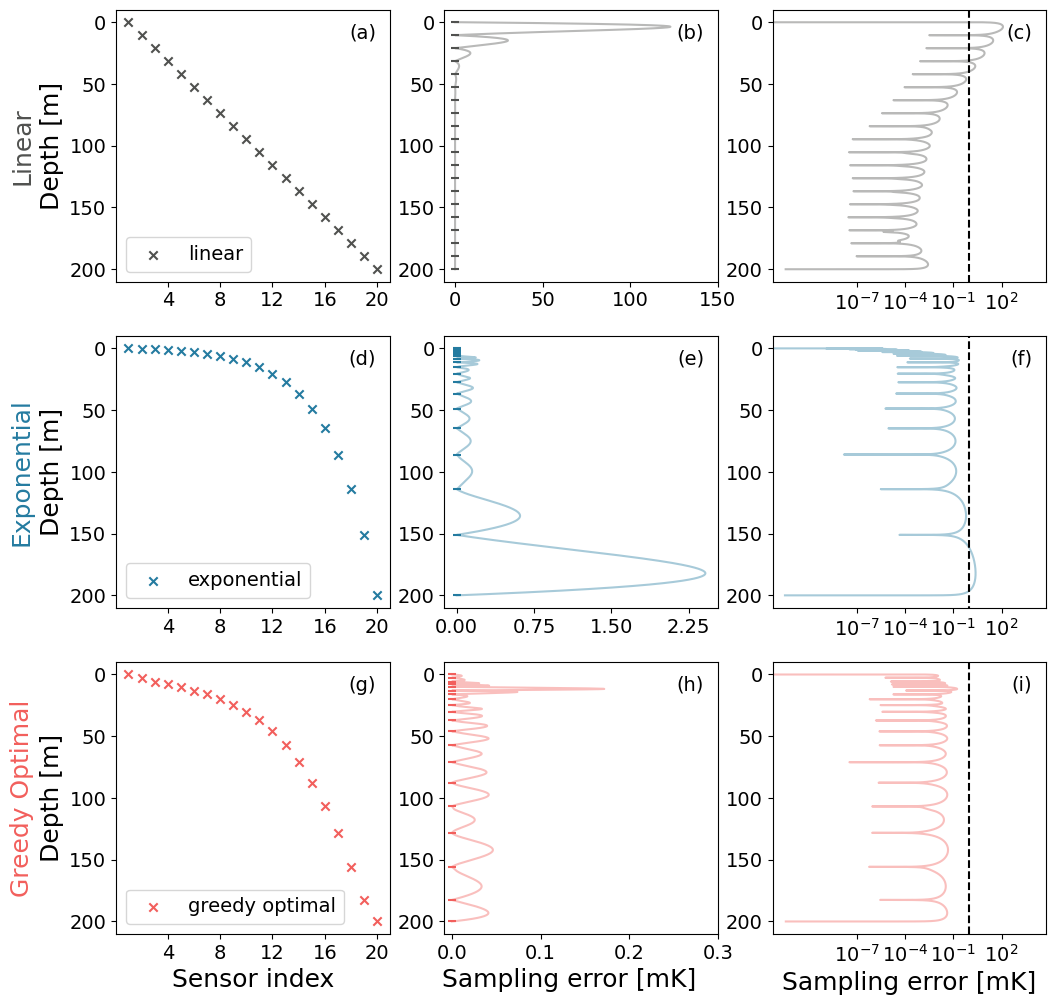

In [5]:

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

left, width = 0, 0
bottom, height = .25, .5
right = left + width
top = bottom + height

plt.figure(figsize=(12, 12))


ax1 = plt.subplot2grid((3,3), (0, 0),colspan=1,rowspan=1)
ax1.scatter(number_sens,EDML_sensor_depths_linear,c='#50514f',alpha=1,marker='x', label='linear')
ax1.text(-0.3, 0.5 * (bottom + top), 'Linear',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax1.transAxes,
        fontsize=18,
        c='#50514f')
ax1.set_ylabel("\nDepth [m]",fontsize=18)
ax1.invert_yaxis()
ax1.legend(fontsize=14,loc='lower left')
ax1.text(0.95, 0.95, '(a)', horizontalalignment='right', verticalalignment='top', transform=ax1.transAxes,fontsize=14)


ax2 = plt.subplot2grid((3,3), (0, 1),colspan=1,rowspan=1,sharey=ax1)
ax2.plot(EDML_accumulated_error_linear*1000,error_grid,c='#50514f',alpha=0.4, label="Mean error")
ax2.scatter(np.zeros(sensor_count),EDML_sensor_depths_linear,marker='_',c='#50514f',label='linear')
ax2.invert_yaxis()
ax2.set_xticks([0, 50,100,150])
ax2.text(0.95, 0.95, '(b)', horizontalalignment='right', verticalalignment='top', transform=ax2.transAxes,fontsize=14)

ax3 = plt.subplot2grid((3,3), (0, 2),colspan=1,rowspan=1, sharey=ax1)
ax3.plot(EDML_accumulated_error_linear,error_grid,c='#50514f',alpha=0.4, label="Mean error")
ax3.scatter(np.zeros(sensor_count),EDML_sensor_depths_linear,marker='_',c='#50514f',label='linear')
ax3.invert_yaxis()
ax3.set_xscale('log')
ax3.axvline(x=10**-3, ymin=200, ymax=0, color='black',linestyle='--')
ax3.text(0.95, 0.95, '(c)', horizontalalignment='right', verticalalignment='top', transform=ax3.transAxes,fontsize=14)


ax4 = plt.subplot2grid((3,3), (1, 0),colspan=1,rowspan=1, sharex=ax1, sharey=ax1)
ax4.scatter(number_sens,EDML_sensor_depths_logarthmic,c='#247ba0',alpha=1,marker='x',label='exponential')
ax4.set_ylabel("\nDepth [m]",fontsize=18)
ax4.text(-0.3, 0.5 * (bottom + top), 'Exponential',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax4.transAxes,
        fontsize=18,
        c='#247ba0')
ax4.invert_yaxis()
ax4.legend(fontsize=14,loc='lower left')
ax4.text(0.95, 0.95, '(d)', horizontalalignment='right', verticalalignment='top', transform=ax4.transAxes,fontsize=14)

ax5 = plt.subplot2grid((3,3), (1, 1),colspan=1,rowspan=1, sharey=ax1)
ax5.plot(EDML_accumulated_error_logarthmic*1000,error_grid, c='#247ba0', alpha=0.4, label='exponential')
ax5.scatter(np.zeros(sensor_count),EDML_sensor_depths_logarthmic,marker='_',c='#247ba0',label='Sensor\npoints')
ax5.set_xticks([0, 0.75,1.5,2.25])
ax5.invert_yaxis()
ax5.text(0.95, 0.95, '(e)', horizontalalignment='right', verticalalignment='top', transform=ax5.transAxes,fontsize=14)


ax6 = plt.subplot2grid((3,3), (1, 2),colspan=1,rowspan=1, sharex=ax3, sharey=ax1)
ax6.plot(EDML_accumulated_error_logarthmic,error_grid, c='#247ba0', alpha=0.4, label='exponential')
ax6.invert_yaxis()
ax6.set_xscale('log')
ax6.axvline(x=10**-3, ymin=200, ymax=0, color='black',linestyle='--')
ax6.text(0.95, 0.95, '(f)', horizontalalignment='right', verticalalignment='top', transform=ax6.transAxes,fontsize=14)


ax7 = plt.subplot2grid((3,3), (2, 0),colspan=1,rowspan=1, sharex=ax1, sharey=ax1)
ax7.scatter(number_sens,EDML_sensor_depths_go_avg,c='#f25f5c',alpha=1,marker='x',label='greedy optimal')
ax7.set_ylabel("\nDepth [m]",fontsize=18)
ax7.text(-0.3, 0.5 * (bottom + top), 'Greedy Optimal',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax7.transAxes,
        fontsize=18,
        c='#f25f5c')
ax7.set_xlabel("Sensor index",fontsize=18)
ax7.invert_yaxis()
ax7.legend(fontsize=14,loc='lower left')
ax7.text(0.95, 0.95, '(g)', horizontalalignment='right', verticalalignment='top', transform=ax7.transAxes,fontsize=14)
ax7.set_xticks([4, 8,12,16,20])


ax8 = plt.subplot2grid((3,3), (2, 1),colspan=1,rowspan=1, sharey=ax1)
ax8.plot(EDML_accumulated_error_go_avg*1000,error_grid, c='#f25f5c', alpha=0.4, label="greedy optimal")
ax8.scatter(np.zeros(sensor_count),EDML_sensor_depths_go_avg,marker='_',c='#f25f5c',label='Sensor\npoints')
ax8.set_xlabel("Sampling error [mK]   ",fontsize=18)
ax8.invert_yaxis()
ax8.set_xticks([0, 0.10,0.20,0.3])
ax8.text(0.95, 0.95, '(h)', horizontalalignment='right', verticalalignment='top', transform=ax8.transAxes,fontsize=14)
ax8.axvline(x=0.27, ymin=200, ymax=0, color='white',linestyle='--')

ax9= plt.subplot2grid((3,3), (2, 2),colspan=1,rowspan=1, sharex=ax3, sharey=ax1)
ax9.plot(EDML_accumulated_error_go_avg,error_grid, c='#f25f5c', alpha=0.4, label="greedy optimal")
ax9.set_xlabel("Sampling error [mK]",fontsize=18)
ax9.invert_yaxis()
ax9.set_xscale('log')
ax9.set_xticks([10**-10,10**-7,10**-4, 10**-1],labels=[r"$10^{-7}$",r"$10^{-4}$",r"$10^{-1}$", r"$10^{2}$"])
ax9.axvline(x=10**-3, ymin=200, ymax=0, color='black',linestyle='--')
ax9.text(0.95, 0.95, '(i)', horizontalalignment='right', verticalalignment='top', transform=ax9.transAxes,fontsize=14)
ax9.axvline(x=10**1, ymin=200, ymax=0, color='white',linestyle='--')

##### Figure 3. Comparison of the results of greedy optimal sensor placements for the cases of EDML and GRIP, assuming no device error. 

<u>Steps to reproduce plot:</u> <br>
Run 'Sensor placements/code/EDML_varying_sensors_5_20_err00.py' (Skip this if it's already run for previous plot). <br>
Run 'Sensor placements/code/GRIP_varying_sensors_5_20_err00.py'. 

In [6]:
for sn in [20]:
    GRIP_sensor_depths_go_avg= np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_00mK/GRIP_res_%dsensor_0derr_sensor_depths_go_avg.npy'%(sn))
    GRIP_accumulated_error_go_avg=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_00mK/GRIP_res_%dsensor_0derr_accumulated_error_go_avg.npy'%(sn))
    

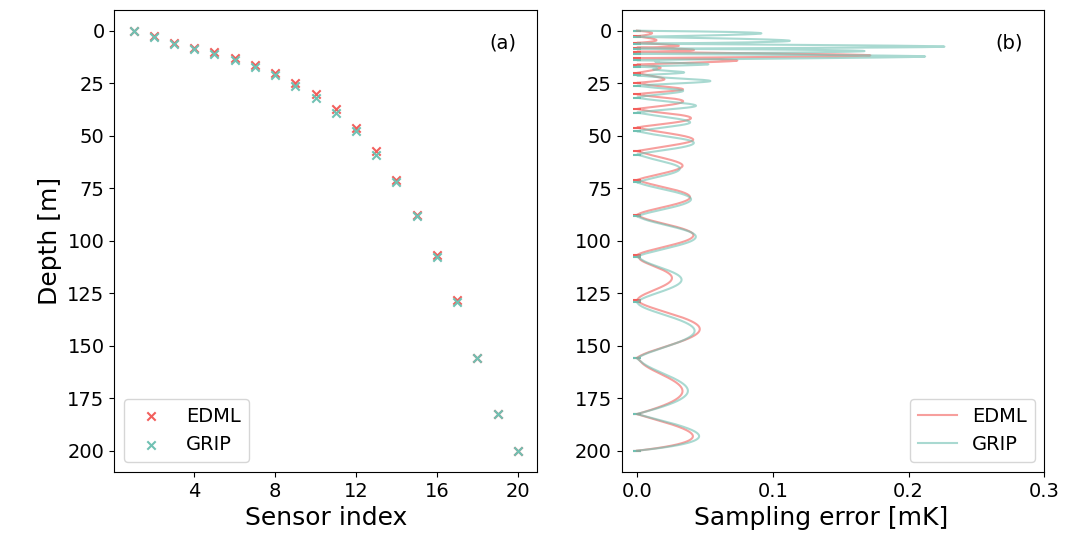

In [7]:

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

left, width = 0, 0
bottom, height = .25, .5
right = left + width
top = bottom + height

plt.figure(figsize=(12, 6))


ax1 = plt.subplot2grid((1,2), (0, 0),colspan=1,rowspan=1)
ax1.scatter(number_sens,EDML_sensor_depths_go_avg,c='#f25f5c',alpha=1,marker='x',label='EDML')
ax1.scatter(number_sens,GRIP_sensor_depths_go_avg,c='#70c1b3',alpha=1,marker='x',label='GRIP')
ax1.set_ylabel("\nDepth [m]",fontsize=18)
ax1.set_xlabel("Sensor index",fontsize=18)
ax1.invert_yaxis()
ax1.legend(fontsize=14,loc='lower left')
ax1.text(0.95, 0.95, '(a)', horizontalalignment='right', verticalalignment='top', transform=ax1.transAxes,fontsize=14)
ax1.set_xticks([4, 8,12,16,20])


ax2 = plt.subplot2grid((1,2), (0, 1),colspan=1,rowspan=1)
ax2.plot(EDML_accumulated_error_go_avg*1000,error_grid, c='#f25f5c', alpha=0.6, label="EDML")
ax2.scatter(np.zeros(sensor_count),EDML_sensor_depths_go_avg,marker='_',c='#f25f5c')
ax2.plot(GRIP_accumulated_error_go_avg*1000,error_grid, c='#70c1b3', alpha=0.6, label="GRIP")
ax2.scatter(np.zeros(sensor_count),GRIP_sensor_depths_go_avg,marker='_',c='#70c1b3')
ax2.set_xlabel("Sampling error [mK]   ",fontsize=18)
ax2.invert_yaxis()
ax2.set_xticks([0, 0.10,0.20,0.3])
ax2.text(0.95, 0.95, '(b)', horizontalalignment='right', verticalalignment='top', transform=ax2.transAxes,fontsize=14)
ax2.axvline(x=0.27, ymin=200, ymax=0, color='white',linestyle='--')
ax2.legend(fontsize=14,loc='lower right')


#### 3.2 Dependence of sampling error on the number of sensors used for borehole thermometry

##### Figure 4. The sampling of linear, exponential and greedy optimal sensor placements with and without device error were computed for 5 to 20 sensors for EDML. 

<u>Steps to reproduce plot:</u><br>
Run 'Sensor placements/code/EDML_varying_sensors_5_20_err00.py' (Skip this if it's already run). <br>
Run 'Sensor placements/code/EDML_varying_sensors_5_20_err05.py'. <br>
Run 'Sensor placements/code/EDML_varying_sensors_5_20_err10.py'. 

In [8]:
rm_sensors=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

EDML_res_sensor_0derr_sensor_depths_linear={}
EDML_res_sensor_0derr_accumulated_error_linear={}

EDML_res_sensor_0derr_sensor_depths_logarthmic={}
EDML_res_sensor_0derr_accumulated_error_logarthmic={}

EDML_res_sensor_0derr_sensor_depths_go_avg={}
EDML_res_sensor_0derr_accumulated_error_go_avg={}


EDML_res_sensor_5derr_sensor_depths_linear={}
EDML_res_sensor_5derr_accumulated_error_linear={}

EDML_res_sensor_5derr_sensor_depths_logarthmic={}
EDML_res_sensor_5derr_accumulated_error_logarthmic={}

EDML_res_sensor_5derr_sensor_depths_go_avg={}
EDML_res_sensor_5derr_accumulated_error_go_avg={}

EDML_res_sensor_10derr_sensor_depths_linear={}
EDML_res_sensor_10derr_accumulated_error_linear={}

EDML_res_sensor_10derr_sensor_depths_logarthmic={}
EDML_res_sensor_10derr_accumulated_error_logarthmic={}

EDML_res_sensor_10derr_sensor_depths_go_avg={}
EDML_res_sensor_10derr_accumulated_error_go_avg={}

for sn in rm_sensors:

    EDML_res_sensor_0derr_sensor_depths_linear[sn]= np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_sensor_depths_linear.npy'%(sn))
    EDML_res_sensor_0derr_accumulated_error_linear[sn]=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_accumulated_error_linear.npy'%(sn))
    
    EDML_res_sensor_0derr_sensor_depths_logarthmic[sn]=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_sensor_depths_logarthmic.npy'%(sn))
    EDML_res_sensor_0derr_accumulated_error_logarthmic[sn]=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_accumulated_error_logarthmic.npy'%(sn))
    
    EDML_res_sensor_0derr_sensor_depths_go_avg[sn]= np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_sensor_depths_go_avg.npy'%(sn))
    EDML_res_sensor_0derr_accumulated_error_go_avg[sn]=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_accumulated_error_go_avg.npy'%(sn))

    
    EDML_res_sensor_5derr_sensor_depths_linear[sn]= np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_05mK/EDML_res_%dsensor_5derr_sensor_depths_linear.npy'%(sn))
    EDML_res_sensor_5derr_accumulated_error_linear[sn]=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_05mK/EDML_res_%dsensor_5derr_accumulated_error_linear.npy'%(sn))
    
    EDML_res_sensor_5derr_sensor_depths_logarthmic[sn]=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_05mK/EDML_res_%dsensor_5derr_sensor_depths_logarthmic.npy'%(sn))
    EDML_res_sensor_5derr_accumulated_error_logarthmic[sn]=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_05mK/EDML_res_%dsensor_5derr_accumulated_error_logarthmic.npy'%(sn))
    
    EDML_res_sensor_5derr_sensor_depths_go_avg[sn]= np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_05mK/EDML_res_%dsensor_5derr_sensor_depths_go_avg.npy'%(sn))
    EDML_res_sensor_5derr_accumulated_error_go_avg[sn]=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_05mK/EDML_res_%dsensor_5derr_accumulated_error_go_avg.npy'%(sn))

    
    EDML_res_sensor_10derr_sensor_depths_linear[sn]= np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_10mK/EDML_res_%dsensor_10derr_sensor_depths_linear.npy'%(sn))
    EDML_res_sensor_10derr_accumulated_error_linear[sn]=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_10mK/EDML_res_%dsensor_10derr_accumulated_error_linear.npy'%(sn))
    
    EDML_res_sensor_10derr_sensor_depths_logarthmic[sn]=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_10mK/EDML_res_%dsensor_10derr_sensor_depths_logarthmic.npy'%(sn))
    EDML_res_sensor_10derr_accumulated_error_logarthmic[sn]=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_10mK/EDML_res_%dsensor_10derr_accumulated_error_logarthmic.npy'%(sn))
    
    EDML_res_sensor_10derr_sensor_depths_go_avg[sn]= np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_10mK/EDML_res_%dsensor_10derr_sensor_depths_go_avg.npy'%(sn))
    EDML_res_sensor_10derr_accumulated_error_go_avg[sn]=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_10mK/EDML_res_%dsensor_10derr_accumulated_error_go_avg.npy'%(sn))


In [9]:
EDML_linear_derr0_plot=[]
EDML_logarithmic_derr0_plot=[]
EDML_go_avg_derr0_plot=[]

EDML_linear_derr10mK_plot=[]
EDML_logarithmic_derr10mK_plot=[]
EDML_go_avg_derr10mK_plot=[]

EDML_linear_derr5mK_plot=[]
EDML_logarithmic_derr5mK_plot=[]
EDML_go_avg_derr5mK_plot=[]

for sn in rm_sensors:
    EDML_linear_derr0_plot.append(max(EDML_res_sensor_0derr_accumulated_error_linear[sn]))
    EDML_logarithmic_derr0_plot.append(max(EDML_res_sensor_0derr_accumulated_error_logarthmic[sn]))
    EDML_go_avg_derr0_plot.append(max(EDML_res_sensor_0derr_accumulated_error_go_avg[sn]))
    
    EDML_linear_derr10mK_plot.append(max(EDML_res_sensor_10derr_accumulated_error_linear[sn]))
    EDML_logarithmic_derr10mK_plot.append(max(EDML_res_sensor_10derr_accumulated_error_logarthmic[sn]))
    EDML_go_avg_derr10mK_plot.append(max(EDML_res_sensor_10derr_accumulated_error_go_avg[sn]))

    EDML_linear_derr5mK_plot.append(max(EDML_res_sensor_5derr_accumulated_error_linear[sn]))
    EDML_logarithmic_derr5mK_plot.append(max(EDML_res_sensor_5derr_accumulated_error_logarthmic[sn]))
    EDML_go_avg_derr5mK_plot.append(max(EDML_res_sensor_5derr_accumulated_error_go_avg[sn]))



Text(0.15, 0.1, '(c)')

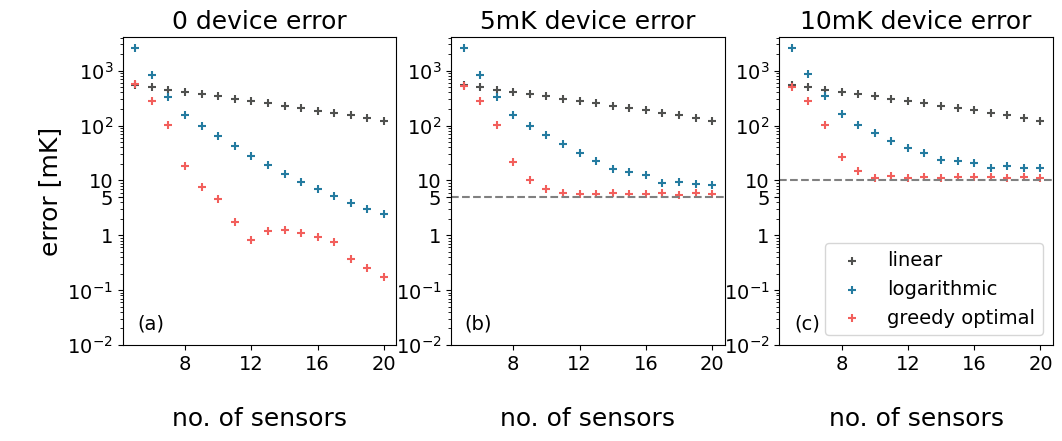

In [10]:
no_sensors_axis=rm_sensors

import matplotlib.pyplot as plt 
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.figure(figsize=(12, 4))

ax1 = plt.subplot2grid((1,3), (0, 0),colspan=1,rowspan=1)
ax1.set_title('0 device error',fontsize=18)
ax1.scatter(no_sensors_axis,EDML_linear_derr0_plot,c='#50514f',alpha=1,marker='+', label='linear')
ax1.scatter(no_sensors_axis,EDML_logarithmic_derr0_plot,c='#247ba0',alpha=1,marker='+', label='logarithmic')
ax1.scatter(no_sensors_axis,EDML_go_avg_derr0_plot,c='#f25f5c',alpha=1,marker='+', label='greedy optimal')
ax1.set_ylabel("\nerror [mK]",fontsize=18)
ax1.set_xlabel("\nno. of sensors",fontsize=18)
ax1.set_yscale('log')
ax1.set_yticks([10**-5,10**-4,10**-3,5*10**-3, 10**-2, 10**-1,10**0,],labels=[r"$10^{-2}$",r"$10^{-1}$",r"1", r"5", r"10",r"$10^{2}$",r"$10^{3}$"])
ax1.set_xticks([8,12,16,20],labels=[r"8",r"12",r"16", r"20"])
ax1.text(0.15, 0.1, '(a)', horizontalalignment='right', verticalalignment='top', transform=ax1.transAxes,fontsize=14)


ax2 = plt.subplot2grid((1,3), (0, 1),colspan=1,rowspan=1, sharey=ax1)
ax2.set_title('5mK device error',fontsize=18)
ax2.scatter(no_sensors_axis,EDML_linear_derr5mK_plot,c='#50514f',alpha=1,marker='+', label='linear')
ax2.scatter(no_sensors_axis,EDML_logarithmic_derr5mK_plot,c='#247ba0',alpha=1,marker='+', label='logarithmic')
ax2.scatter(no_sensors_axis,EDML_go_avg_derr5mK_plot,c='#f25f5c',alpha=1,marker='+', label='greedy optimal')
ax2.set_xlabel("\nno. of sensors",fontsize=18)
ax2.set_yscale('log')
ax2.axhline(y=5*10**-3,color='grey',linestyle='--')
ax2.set_yticks([10**-5,10**-4,10**-3,5*10**-3, 10**-2, 10**-1,10**0,],labels=[r"$10^{-2}$",r"$10^{-1}$",r"1", r"5", r"10",r"$10^{2}$",r"$10^{3}$"])
ax2.set_xticks([8,12,16,20],labels=[r"8",r"12",r"16", r"20"])
ax2.text(0.15, 0.1, '(b)', horizontalalignment='right', verticalalignment='top', transform=ax2.transAxes,fontsize=14)



ax3 = plt.subplot2grid((1,3), (0, 2),colspan=1,rowspan=1,sharey=ax1)
ax3.set_title('10mK device error',fontsize=18)
ax3.scatter(no_sensors_axis,EDML_linear_derr10mK_plot,c='#50514f',alpha=1,marker='+', label='linear')
ax3.scatter(no_sensors_axis,EDML_logarithmic_derr10mK_plot,c='#247ba0',alpha=1,marker='+', label='logarithmic')
ax3.scatter(no_sensors_axis,EDML_go_avg_derr10mK_plot,c='#f25f5c',alpha=1,marker='+', label='greedy optimal')
ax3.set_xlabel("\nno. of sensors",fontsize=18)
ax3.set_yscale('log')
ax3.legend(fontsize=14,loc='lower right')
ax3.axhline(y=10**-2,color='grey',linestyle='--')
ax3.set_yticks([10**-5,10**-4,10**-3,5*10**-3, 10**-2, 10**-1,10**0,],labels=[r"$10^{-2}$",r"$10^{-1}$",r"1", r"5", r"10",r"$10^{2}$",r"$10^{3}$"])
ax3.set_xticks([8,12,16,20],labels=[r"8",r"12",r"16", r"20"])
ax3.text(0.15, 0.1, '(c)', horizontalalignment='right', verticalalignment='top', transform=ax3.transAxes,fontsize=14)




### 4 Discussion

#### 4.1 Numerical uncertainty of greedy optimal sampling algorithm

##### Figure 5. Numerical uncertainty handling of greedy optimal sampling. 

<u>Steps to reproduce plot:</u><br>
Run 'Sensor placements/code/Discussion_varying_ino_of_avg_initial_EDML.py'. <br>
Run 'Sensor placements/code/Discussion_varying_ino_of_avg_initial_GRIP.py'. 

In [11]:
EDML_discussion_sensor_depths_go_avg={}
EDML_discussion_accumulated_error_go_avg={}

GRIP_discussion_sensor_depths_go_avg={}
GRIP_discussion_accumulated_error_go_avg={}

n_avges=[1,20,250,500,1000]

for av in n_avges:
    EDML_discussion_sensor_depths_go_avg[av]= np.load('Sensor placements/output/Discussion/Numerical_uncertainty/EDML_Model_error/EDML_%d_sensor_depth_go_avges.npy'%(av))
    EDML_discussion_accumulated_error_go_avg[av]=np.load('Sensor placements/output/Discussion/Numerical_uncertainty/EDML_Model_error/EDML_%d_acc_error_go_avges.npy'%(av))
    
    GRIP_discussion_sensor_depths_go_avg[av]= np.load('Sensor placements/output/Discussion/Numerical_uncertainty/GRIP_Model_error/GRIP_%d_sensor_depth_go_avges.npy'%(av))
    GRIP_discussion_accumulated_error_go_avg[av]=np.load('Sensor placements/output/Discussion/Numerical_uncertainty/GRIP_Model_error/GRIP_%d_acc_error_go_avges.npy'%(av))
    

In [12]:
EDML_minLine_1000_sets_acc=np.load('Sensor placements/output/Discussion/Numerical_uncertainty/EDML_Model_error/EDML_1000_minLine_sensor_accumulated_error_go_1000.npy')
EDML_minLine_1000_sets_sensors=np.load('Sensor placements/output/Discussion/Numerical_uncertainty/EDML_Model_error/EDML_1000_minLine_sensors_go_1000.npy')

GRIP_minLine_1000_sets_acc=np.load('Sensor placements/output/Discussion/Numerical_uncertainty/GRIP_Model_error/GRIP_1000_minLine_sensor_accumulated_error_go_1000.npy')
GRIP_minLine_1000_sets_sensors=np.load('Sensor placements/output/Discussion/Numerical_uncertainty/GRIP_Model_error/GRIP_1000_minLine_sensors_go_1000.npy')

In [13]:
EDML_max_SamplingError=np.zeros(1000)
GRIP_max_SamplingError=np.zeros(1000)
for m in range(1000):
    EDML_max_SamplingError[m]=max(EDML_minLine_1000_sets_acc[m,:])
    GRIP_max_SamplingError[m]=max(GRIP_minLine_1000_sets_acc[m,:])

In [14]:
Max_EDML_discussion_acc_error_go_avg=np.zeros(5)
Max_GRIP_discussion_acc_error_go_avg=np.zeros(5)

Mean_EDML_discussion_acc_error_go_avg=np.zeros(5)
Mean_GRIP_discussion_acc_error_go_avg=np.zeros(5)

Std_EDML_discussion_acc_error_go_avg=np.zeros(5)
Std_GRIP_discussion_acc_error_go_avg=np.zeros(5)

for i in range(5):
    Max_EDML_discussion_acc_error_go_avg[i]=np.max(EDML_discussion_accumulated_error_go_avg[n_avges[i]])
    Max_GRIP_discussion_acc_error_go_avg[i]=np.max(GRIP_discussion_accumulated_error_go_avg[n_avges[i]])
     
    Mean_EDML_discussion_acc_error_go_avg[i]=np.mean(EDML_discussion_accumulated_error_go_avg[n_avges[i]])
    Mean_GRIP_discussion_acc_error_go_avg[i]=np.mean(GRIP_discussion_accumulated_error_go_avg[n_avges[i]])
    
    Std_EDML_discussion_acc_error_go_avg[i]=np.std(EDML_discussion_accumulated_error_go_avg[n_avges[i]])
    Std_GRIP_discussion_acc_error_go_avg[i]=np.std(GRIP_discussion_accumulated_error_go_avg[n_avges[i]])


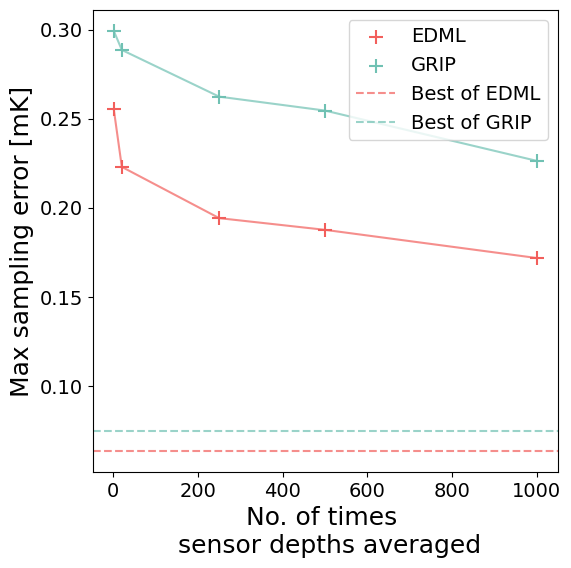

In [15]:
plt.figure(figsize=(6, 6))
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.scatter(n_avges,Max_EDML_discussion_acc_error_go_avg*1000,c='#f25f5c',alpha=1,marker='+',s=100, label='EDML')
plt.plot(n_avges,Max_EDML_discussion_acc_error_go_avg*1000,c='#f25f5c',alpha=0.7)
plt.scatter(n_avges,Max_GRIP_discussion_acc_error_go_avg*1000,c='#70c1b3',alpha=1,marker='+',s=100, label='GRIP')
plt.plot(n_avges,Max_GRIP_discussion_acc_error_go_avg*1000,c='#70c1b3',alpha=0.7)

plt.axhline(y=np.min(EDML_max_SamplingError)*1000,c='#f25f5c',linestyle='--', alpha=0.7, label='Best of EDML')
plt.axhline(y=np.min(GRIP_max_SamplingError)*1000,c='#70c1b3',linestyle='--',alpha=0.7,label='Best of GRIP')
plt.ticklabel_format(scilimits=[-3,6])
plt.ylabel("Max sampling error [mK]",fontsize=18)
plt.xlabel("No. of times \n sensor depths averaged",fontsize=18)
plt.legend(fontsize=14)
plt.show()


#### 4.2 Sensitivity on past climate and ice borehole site properties

##### Figure 6. Greedy optimal sensor placements’ sensitivity to the surface temperature time series and the accumulation rate that determines the advection.

<u>Steps to reproduce plot:</u><br>

Run 'Sensor placements/code/Discussion_past_climate_impact_EDML0006.py'. <br>
Run 'Sensor placements/code/Discussion_past_climate_impact_EDML1006.py'. <br>
Run 'Sensor placements/code/Discussion_past_climate_impact_EDML2006.py'. <br>
Run 'Sensor placements/code/Discussion_past_climate_impact_EDML3006.py'. <br>
Run 'Sensor placements/code/Discussion_past_climate_impact_EDML2000.py'. <br>
Run 'Sensor placements/code/Discussion_past_climate_impact_EDML2001.py'. <br>

Run 'Sensor placements/code/Discussion_0adv_EDML_2006_go_avg.py'. <br>
Run 'Sensor placements/code/Discussion_adv64_EDML_2006_go_avg.py'. <br>
Run 'Sensor placements/code/Discussion_adv230_GRIP_2006_go_avg.py'. <br>
Run 'Sensor placements/code/Discussion_adv1000_GRIP_2006_go_avg.py'. 

In [16]:
EDML_sensor_depths0006_go_inc_profs={}
with open('Sensor placements/output/Discussion/Past_climate_impact/EDML_sensor_depths0006_go_avg20_each_prof.pkl', 'rb') as f7:
    EDML_sensor_depths0006_go_inc_profs=dill.load(f7)  

EDML_sensor_depths1006_go_inc_profs={}
with open('Sensor placements/output/Discussion/Past_climate_impact/EDML_sensor_depths1006_go_avg20_each_prof.pkl', 'rb') as f1:
    EDML_sensor_depths1006_go_inc_profs=dill.load(f1)

EDML_sensor_depths2006_go_inc_profs={}
with open('Sensor placements/output/Discussion/Past_climate_impact/EDML_sensor_depths2006_go_avg20_each_prof.pkl', 'rb') as f5:
    EDML_sensor_depths2006_go_inc_profs=dill.load(f5)    
       
EDML_sensor_depths3006_go_inc_profs={}
with open('Sensor placements/output/Discussion/Past_climate_impact/EDML_sensor_depths3006_go_avg20_each_prof.pkl', 'rb') as f2:
    EDML_sensor_depths3006_go_inc_profs=dill.load(f2)
    
EDML_sensor_depths2000_go_inc_profs={}
with open('Sensor placements/output/Discussion/Past_climate_impact/EDML_sensor_depths2000_go_avg20_each_prof.pkl', 'rb') as f3:
    EDML_sensor_depths2000_go_inc_profs=dill.load(f3)
    
EDML_sensor_depths2001_go_inc_profs={}
with open('Sensor placements/output/Discussion/Past_climate_impact/EDML_sensor_depths2001_go_avg20_each_prof.pkl', 'rb') as f4:
    EDML_sensor_depths2001_go_inc_profs=dill.load(f4)
    



In [17]:
adv0EDML_sensor_depths2006_go_avg=np.load('Sensor placements/output/Discussion/Advection_impact/EDML_0adv_sensor_depths2006_go_avg.npy')
adv64EDML_sensor_depths2006_go_avg=np.load('Sensor placements/output/Discussion/Advection_impact/EDML_adv64_sensor_depths2006_go_avg.npy')
adv230GIRP_sensor_depths2006_go_avg=np.load('Sensor placements/output/Discussion/Advection_impact/GRIP_adv230_sensor_depths2006_go_avg.npy')
adv1000GIRP_sensor_depths2006_go_avg=np.load('Sensor placements/output/Discussion/Advection_impact/GRIP_adv1000_sensor_depths2006_go_avg.npy')

In [18]:
def sensorIndex_samples(sensorsIndex,no_of_sensor_depth_sets,sensor_depths_profs):
    yax=[]
    
    for i in range(no_of_sensor_depth_sets):
        yax.append(np.array(sensor_depths_profs[i][:,0]))

    return np.array(yax)[:,sensorsIndex]

In [19]:
number_sens=np.linspace(0,19,20)+1

Text(0.95, 0.95, '(b)')

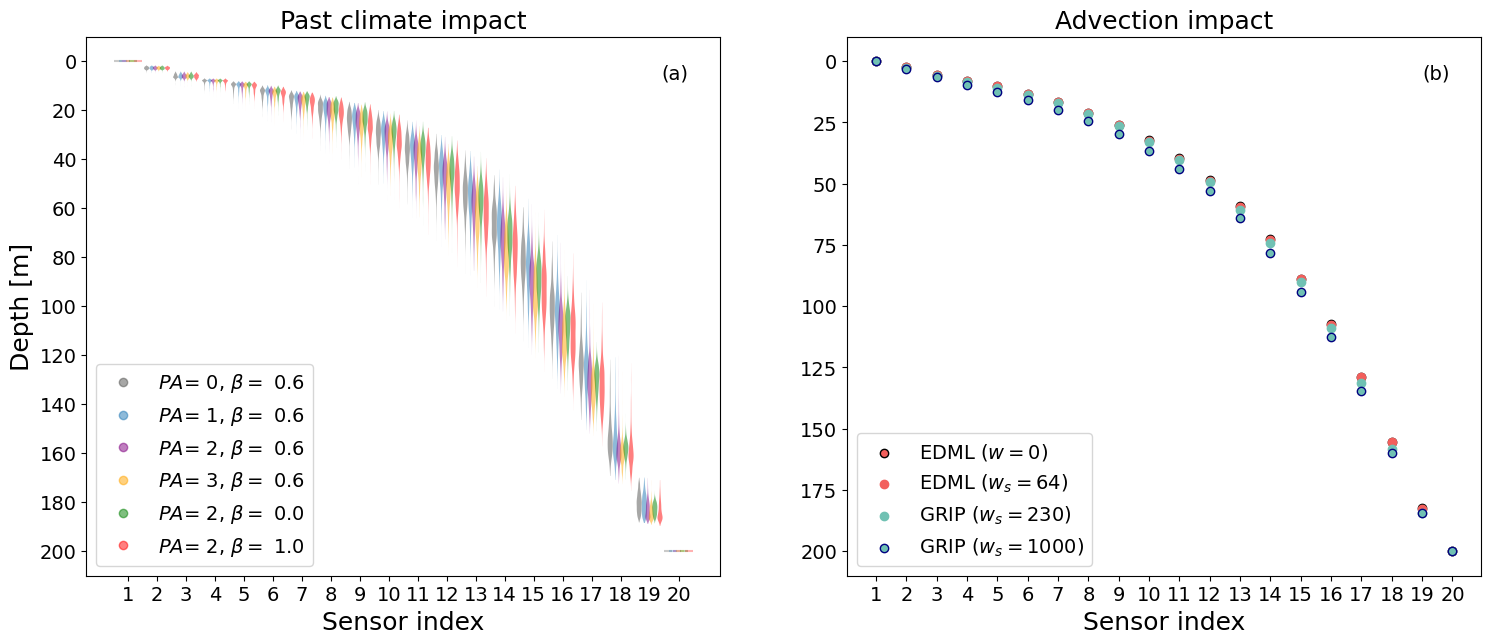

In [20]:
#from matplotlib.legend_handler import HandlerLine2D
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)


plt.figure(figsize=(18, 7))

ax1 = plt.subplot2grid((1,2), (0, 0),colspan=1,rowspan=1)


ax1.set_title('Past climate impact',fontsize=18)
colors = ['#50514f','#1f77b4','purple','#FFA500', 'Green', 'Red']
xcuts=[-0.36,-0.18,-0.06,+0.06,+0.18 ,+0.36]

p0b6 = mlines.Line2D([], [], linewidth=0,color=colors[0], marker='.', alpha=0.5, markersize=12, markerfacecolor=colors[0],  linestyle='-', label='$PA$= %d, $\\beta=$ %.1f'%(0,0.6))
p1b6 = mlines.Line2D([], [], linewidth=0,color=colors[1], marker='.', alpha=0.5, markersize=12, markerfacecolor=colors[1],  linestyle='-', label='$PA$= %d, $\\beta=$ %.1f'%(1,0.6))
p2b6 = mlines.Line2D([], [], linewidth=0,color=colors[2], marker='.', alpha=0.5, markersize=12, markerfacecolor=colors[2],  linestyle='-', label='$PA$= %d, $\\beta=$ %.1f'%(2,0.6))
p3b6 = mlines.Line2D([], [], linewidth=0,color=colors[3], marker='.',alpha=0.5, markersize=12, markerfacecolor=colors[3], linestyle='-', label='$PA$= %d, $\\beta=$ %.1f'%(3,0.6))
p2b0 = mlines.Line2D([], [], linewidth=0,color=colors[4], marker='.',alpha=0.5, markersize=12, markerfacecolor=colors[4], linestyle='-', label='$PA$= %d, $\\beta=$ %.1f'%(2,0.0))
p2b1 = mlines.Line2D([], [], linewidth=0,color=colors[5], marker='.', alpha=0.5,markersize=12, markerfacecolor=colors[5], linestyle='-', label='$PA$= %d, $\\beta=$ %.1f'%(2,1.0))



data=[EDML_sensor_depths0006_go_inc_profs,EDML_sensor_depths1006_go_inc_profs,EDML_sensor_depths2006_go_inc_profs,EDML_sensor_depths3006_go_inc_profs,EDML_sensor_depths2000_go_inc_profs,EDML_sensor_depths2001_go_inc_profs]
for item in range(len(data)):
    all_data=[]
    for i in range(20):
        all_data.append(sensorIndex_samples(i,1000,data[item]))
    plots=ax1.violinplot(all_data,positions=number_sens+xcuts[item],widths=0.175,points=1000,
                  showmeans=False,showextrema=False,
                  showmedians=False)
    for pc in plots['bodies']:
        pc.set_facecolor(colors[item])
        pc.set_alpha(0.5)
ax1.scatter([1+xcuts[0]],[0],color=colors[0],alpha=0.3,marker='_')
ax1.scatter([1+xcuts[1]],[0],color=colors[1],alpha=0.3,marker='_')
ax1.scatter([1+xcuts[2]],[0],color=colors[2],alpha=0.3,marker='_')
ax1.scatter([1+xcuts[3]],[0],color=colors[3],alpha=0.3,marker='_')
ax1.scatter([1+xcuts[4]],[0],color=colors[4],alpha=0.3,marker='_')
ax1.scatter([1+xcuts[5]],[0],color=colors[5],alpha=0.3,marker='_')

ax1.scatter([20+xcuts[0]],[200],color=colors[0],alpha=0.3,marker='_')
ax1.scatter([20+xcuts[1]],[200],color=colors[1],alpha=0.3,marker='_')
ax1.scatter([20+xcuts[2]],[200],color=colors[2],alpha=0.3,marker='_')
ax1.scatter([20+xcuts[3]],[200],color=colors[3],alpha=0.3,marker='_')
ax1.scatter([20+xcuts[4]],[200],color=colors[4],alpha=0.3,marker='_')
ax1.scatter([20+xcuts[5]],[200],color=colors[5],alpha=0.3,marker='_')

ax1.invert_yaxis()
ax1.legend(handles=[p0b6,p1b6,p2b6,p3b6,p2b0,p2b1],fontsize='14',loc='lower left')
ax1.set_xlabel("Sensor index",fontsize='18')
ax1.set_ylabel("Depth [m]",fontsize='18')
ax1.set_xticks(number_sens)
ax1.set_yticks(np.arange(0, 210, step=20))
ax1.text(0.95, 0.95, '(a)', horizontalalignment='right', verticalalignment='top', transform=ax1.transAxes,fontsize=14)

ax2 = plt.subplot2grid((1,2), (0, 1),colspan=1,rowspan=1)

#ax2.set_title('Polar amplification %d, beta= %.1f'%(2,0.6),fontsize=18)
#ax2.set_title('Extreme advection impact \n (Polar amplification %d, beta= %.1f)'%(2,0.6),fontsize=18)
ax2.set_title('Advection impact',fontsize=18)
ax2.scatter(number_sens,adv0EDML_sensor_depths2006_go_avg,c='#f25f5c',alpha=1,marker='o', edgecolor='black',label='EDML $(w=0)$')
#ax2.plot(number_sens,EDMLws0_means_2006,color='peru',alpha=0.5,linestyle='--')

ax2.scatter(number_sens,adv64EDML_sensor_depths2006_go_avg,c='#f25f5c',alpha=1,marker='o', label='EDML $(w_{s}=64)$')
#ax2.plot(number_sens,EDML_means_2006,color='maroon',alpha=0.5,linestyle='--')

ax2.scatter(number_sens,adv230GIRP_sensor_depths2006_go_avg,c='#70c1b3',alpha=1,marker='o', label='GRIP $(w_{s}=230)$')
#ax2.plot(number_sens,GRIP_means_2006,color='maroon',alpha=0.5)

ax2.scatter(number_sens,adv1000GIRP_sensor_depths2006_go_avg,c='#70c1b3',alpha=1,marker='o', edgecolor='navy', label='GRIP $(w_{s}=1000)$')
#ax2.plot(number_sens,GRIPws1000_means_2006,color='slategray',alpha=0.5)


ax2.invert_yaxis()
#ax2.legend(handles=[p1b6,p3b6,p2b1,p2b0],fontsize='14',loc='lower left')
ax2.legend(fontsize='14',loc='lower left')
ax2.set_xlabel("Sensor index",fontsize='18')
#ax2.set_ylabel("depth [m]",fontsize='18')
ax2.set_xticks(number_sens)
ax2.text(0.95, 0.95, '(b)', horizontalalignment='right', verticalalignment='top', transform=ax2.transAxes,fontsize=14)




### Appendix

#### Appendix B: Sensor placements for GRIP

##### Figure B1. Performance comparison of linear, exponential, and greedy optimal sensor placements in case of GRIP.

<u>Steps to reproduce plot:</u><br>
Run 'Sensor placements/code/GRIP_varying_sensors_5_20_err00.py' (Skip this if it's already run).<br>

In [21]:
for sn in [20]:
    GRIP_sensor_depths_linear= np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_00mK/GRIP_res_%dsensor_0derr_sensor_depths_linear.npy'%(sn))
    GRIP_accumulated_error_linear=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_00mK/GRIP_res_%dsensor_0derr_accumulated_error_linear.npy'%(sn))
    
    GRIP_sensor_depths_logarthmic=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_00mK/GRIP_res_%dsensor_0derr_sensor_depths_logarthmic.npy'%(sn))
    GRIP_accumulated_error_logarthmic=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_00mK/GRIP_res_%dsensor_0derr_accumulated_error_logarthmic.npy'%(sn))
    
    GRIP_sensor_depths_go_avg= np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_00mK/GRIP_res_%dsensor_0derr_sensor_depths_go_avg.npy'%(sn))
    GRIP_accumulated_error_go_avg=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_00mK/GRIP_res_%dsensor_0derr_accumulated_error_go_avg.npy'%(sn))


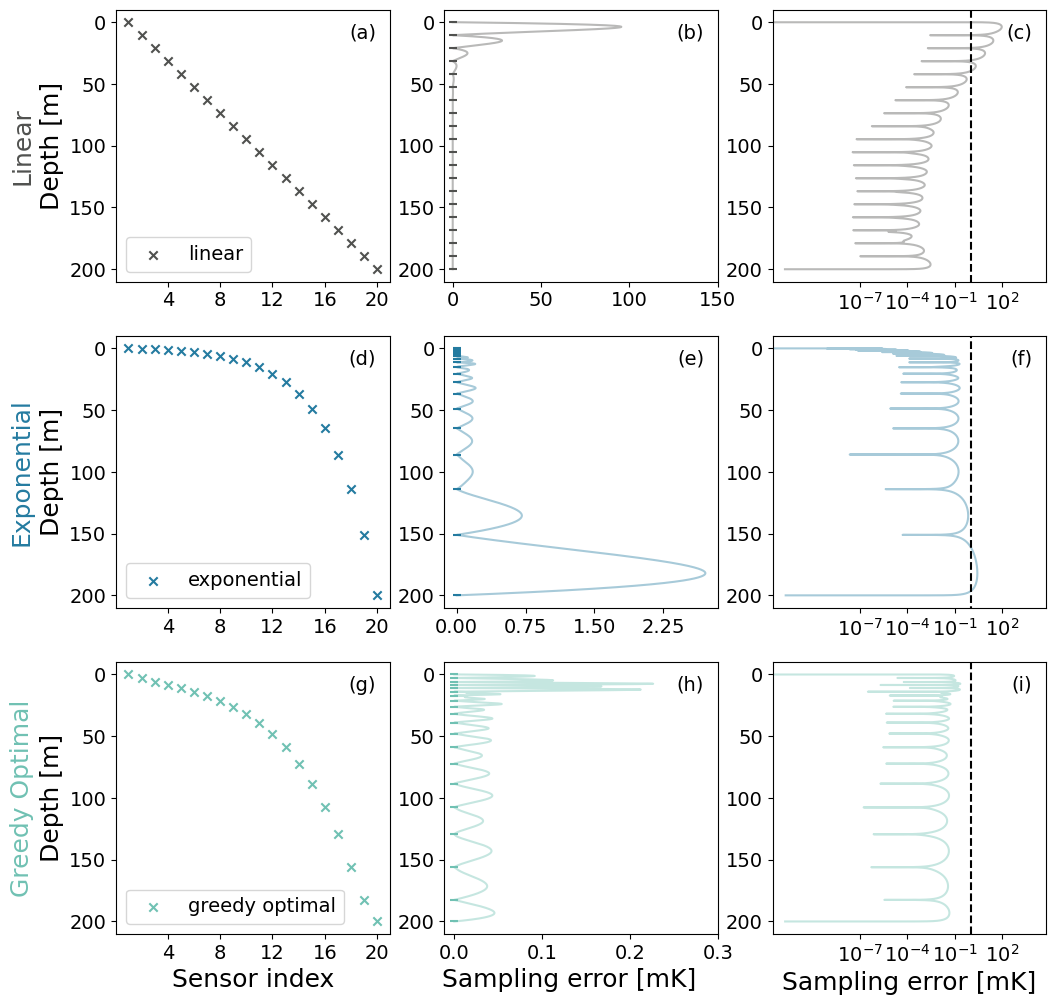

In [22]:

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

left, width = 0, 0
bottom, height = .25, .5
right = left + width
top = bottom + height

plt.figure(figsize=(12, 12))


ax1 = plt.subplot2grid((3,3), (0, 0),colspan=1,rowspan=1)
ax1.scatter(number_sens,GRIP_sensor_depths_linear,c='#50514f',alpha=1,marker='x', label='linear')
ax1.text(-0.3, 0.5 * (bottom + top), 'Linear',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax1.transAxes,
        fontsize=18,
        c='#50514f')
ax1.set_ylabel("\nDepth [m]",fontsize=18)
ax1.invert_yaxis()
ax1.legend(fontsize=14,loc='lower left')
ax1.text(0.95, 0.95, '(a)', horizontalalignment='right', verticalalignment='top', transform=ax1.transAxes,fontsize=14)


ax2 = plt.subplot2grid((3,3), (0, 1),colspan=1,rowspan=1,sharey=ax1)
ax2.plot(GRIP_accumulated_error_linear*1000,error_grid,c='#50514f',alpha=0.4, label="Mean error")
ax2.scatter(np.zeros(sensor_count),GRIP_sensor_depths_linear,marker='_',c='#50514f',label='linear')
ax2.invert_yaxis()
ax2.set_xticks([0, 50,100,150])
ax2.text(0.95, 0.95, '(b)', horizontalalignment='right', verticalalignment='top', transform=ax2.transAxes,fontsize=14)

ax3 = plt.subplot2grid((3,3), (0, 2),colspan=1,rowspan=1, sharey=ax1)
ax3.plot(GRIP_accumulated_error_linear,error_grid,c='#50514f',alpha=0.4, label="Mean error")
ax3.scatter(np.zeros(sensor_count),GRIP_sensor_depths_linear,marker='_',c='#50514f',label='linear')
ax3.invert_yaxis()
ax3.set_xscale('log')
ax3.axvline(x=10**-3, ymin=200, ymax=0, color='black',linestyle='--')
ax3.text(0.95, 0.95, '(c)', horizontalalignment='right', verticalalignment='top', transform=ax3.transAxes,fontsize=14)


ax4 = plt.subplot2grid((3,3), (1, 0),colspan=1,rowspan=1, sharex=ax1, sharey=ax1)
ax4.scatter(number_sens,GRIP_sensor_depths_logarthmic,c='#247ba0',alpha=1,marker='x',label='exponential')
ax4.set_ylabel("\nDepth [m]",fontsize=18)
ax4.text(-0.3, 0.5 * (bottom + top), 'Exponential',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax4.transAxes,
        fontsize=18,
        c='#247ba0')
ax4.invert_yaxis()
ax4.legend(fontsize=14,loc='lower left')
ax4.text(0.95, 0.95, '(d)', horizontalalignment='right', verticalalignment='top', transform=ax4.transAxes,fontsize=14)

ax5 = plt.subplot2grid((3,3), (1, 1),colspan=1,rowspan=1, sharey=ax1)
ax5.plot(GRIP_accumulated_error_logarthmic*1000,error_grid, c='#247ba0', alpha=0.4, label='exponential')
ax5.scatter(np.zeros(sensor_count),GRIP_sensor_depths_logarthmic,marker='_',c='#247ba0',label='Sensor\npoints')
ax5.set_xticks([0, 0.75,1.5,2.25])
ax5.invert_yaxis()
ax5.text(0.95, 0.95, '(e)', horizontalalignment='right', verticalalignment='top', transform=ax5.transAxes,fontsize=14)


ax6 = plt.subplot2grid((3,3), (1, 2),colspan=1,rowspan=1, sharex=ax3, sharey=ax1)
ax6.plot(GRIP_accumulated_error_logarthmic,error_grid, c='#247ba0', alpha=0.4, label='exponential')
ax6.invert_yaxis()
ax6.set_xscale('log')
ax6.axvline(x=10**-3, ymin=200, ymax=0, color='black',linestyle='--')
ax6.text(0.95, 0.95, '(f)', horizontalalignment='right', verticalalignment='top', transform=ax6.transAxes,fontsize=14)


ax7 = plt.subplot2grid((3,3), (2, 0),colspan=1,rowspan=1, sharex=ax1, sharey=ax1)
ax7.scatter(number_sens,GRIP_sensor_depths_go_avg,c='#70c1b3',alpha=1,marker='x',label='greedy optimal')
ax7.set_ylabel("\nDepth [m]",fontsize=18)
ax7.text(-0.3, 0.5 * (bottom + top), 'Greedy Optimal',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax7.transAxes,
        fontsize=18,
        c='#70c1b3')
ax7.set_xlabel("Sensor index",fontsize=18)
ax7.invert_yaxis()
ax7.legend(fontsize=14,loc='lower left')
ax7.text(0.95, 0.95, '(g)', horizontalalignment='right', verticalalignment='top', transform=ax7.transAxes,fontsize=14)
ax7.set_xticks([4, 8,12,16,20])


ax8 = plt.subplot2grid((3,3), (2, 1),colspan=1,rowspan=1, sharey=ax1)
ax8.plot(GRIP_accumulated_error_go_avg*1000,error_grid, c='#70c1b3', alpha=0.4, label="greedy optimal")
ax8.scatter(np.zeros(sensor_count),GRIP_sensor_depths_go_avg,marker='_',c='#70c1b3',label='Sensor\npoints')
ax8.set_xlabel("Sampling error [mK]   ",fontsize=18)
ax8.invert_yaxis()
ax8.set_xticks([0, 0.10,0.20,0.3])
ax8.text(0.95, 0.95, '(h)', horizontalalignment='right', verticalalignment='top', transform=ax8.transAxes,fontsize=14)
ax8.axvline(x=0.27, ymin=200, ymax=0, color='white',linestyle='--')

ax9= plt.subplot2grid((3,3), (2, 2),colspan=1,rowspan=1, sharex=ax3, sharey=ax1)
ax9.plot(GRIP_accumulated_error_go_avg,error_grid, c='#70c1b3', alpha=0.4, label="greedy optimal")
ax9.set_xlabel("Sampling error [mK]",fontsize=18)
ax9.invert_yaxis()
ax9.set_xscale('log')
ax9.set_xticks([10**-10,10**-7,10**-4, 10**-1],labels=[r"$10^{-7}$",r"$10^{-4}$",r"$10^{-1}$", r"$10^{2}$"])
ax9.axvline(x=10**-3, ymin=200, ymax=0, color='black',linestyle='--')
ax9.text(0.95, 0.95, '(i)', horizontalalignment='right', verticalalignment='top', transform=ax9.transAxes,fontsize=14)
ax9.axvline(x=10**1, ymin=200, ymax=0, color='white',linestyle='--')

##### Figure B2. The sampling of linear, exponential and greedy optimal sensor placements with and without device error were computed for 5 to 20 sensors for GRIP. 

<u>Steps to reproduce plot:</u><br>
Run 'Sensor placements/code/GRIP_varying_sensors_5_20_err00.py' (Skip this if it's already run).<br>
Run 'Sensor placements/code/GRIP_varying_sensors_5_20_err05.py' <br>
Run 'Sensor placements/code/GRIP_varying_sensors_5_20_err10.py' 

In [23]:
GRIP_res_sensor_0derr_sensor_depths_linear={}
GRIP_res_sensor_0derr_accumulated_error_linear={}

GRIP_res_sensor_0derr_sensor_depths_logarthmic={}
GRIP_res_sensor_0derr_accumulated_error_logarthmic={}

GRIP_res_sensor_0derr_sensor_depths_go_avg={}
GRIP_res_sensor_0derr_accumulated_error_go_avg={}

rm_sensors=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for sn in rm_sensors:
    GRIP_res_sensor_0derr_sensor_depths_linear[sn]= np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_00mK/GRIP_res_%dsensor_0derr_sensor_depths_linear.npy'%(sn))
    GRIP_res_sensor_0derr_accumulated_error_linear[sn]=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_00mK/GRIP_res_%dsensor_0derr_accumulated_error_linear.npy'%(sn))
    
    GRIP_res_sensor_0derr_sensor_depths_logarthmic[sn]=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_00mK/GRIP_res_%dsensor_0derr_sensor_depths_logarthmic.npy'%(sn))
    GRIP_res_sensor_0derr_accumulated_error_logarthmic[sn]=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_00mK/GRIP_res_%dsensor_0derr_accumulated_error_logarthmic.npy'%(sn))
    
    GRIP_res_sensor_0derr_sensor_depths_go_avg[sn]= np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_00mK/GRIP_res_%dsensor_0derr_sensor_depths_go_avg.npy'%(sn))
    GRIP_res_sensor_0derr_accumulated_error_go_avg[sn]=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_00mK/GRIP_res_%dsensor_0derr_accumulated_error_go_avg.npy'%(sn))

    

In [24]:
GRIP_res_sensor_5derr_sensor_depths_linear={}
GRIP_res_sensor_5derr_accumulated_error_linear={}

GRIP_res_sensor_5derr_sensor_depths_logarthmic={}
GRIP_res_sensor_5derr_accumulated_error_logarthmic={}

GRIP_res_sensor_5derr_sensor_depths_go_avg={}
GRIP_res_sensor_5derr_accumulated_error_go_avg={}



rm_sensors=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for sn in rm_sensors:
    GRIP_res_sensor_5derr_sensor_depths_linear[sn]= np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_05mK/GRIP_res_%dsensor_5derr_sensor_depths_linear.npy'%(sn))
    GRIP_res_sensor_5derr_accumulated_error_linear[sn]=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_05mK/GRIP_res_%dsensor_5derr_accumulated_error_linear.npy'%(sn))
    
    GRIP_res_sensor_5derr_sensor_depths_logarthmic[sn]=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_05mK/GRIP_res_%dsensor_5derr_sensor_depths_logarthmic.npy'%(sn))
    GRIP_res_sensor_5derr_accumulated_error_logarthmic[sn]=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_05mK/GRIP_res_%dsensor_5derr_accumulated_error_logarthmic.npy'%(sn))
    
    GRIP_res_sensor_5derr_sensor_depths_go_avg[sn]= np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_05mK/GRIP_res_%dsensor_5derr_sensor_depths_go_avg.npy'%(sn))
    GRIP_res_sensor_5derr_accumulated_error_go_avg[sn]=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_05mK/GRIP_res_%dsensor_5derr_accumulated_error_go_avg.npy'%(sn))



In [25]:
GRIP_res_sensor_10derr_sensor_depths_linear={}
GRIP_res_sensor_10derr_accumulated_error_linear={}

GRIP_res_sensor_10derr_sensor_depths_logarthmic={}
GRIP_res_sensor_10derr_accumulated_error_logarthmic={}

GRIP_res_sensor_10derr_sensor_depths_go_avg={}
GRIP_res_sensor_10derr_accumulated_error_go_avg={}

rm_sensors=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for sn in rm_sensors:
    GRIP_res_sensor_10derr_sensor_depths_linear[sn]= np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_10mK/GRIP_res_%dsensor_10derr_sensor_depths_linear.npy'%(sn))
    GRIP_res_sensor_10derr_accumulated_error_linear[sn]=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_10mK/GRIP_res_%dsensor_10derr_accumulated_error_linear.npy'%(sn))
    
    GRIP_res_sensor_10derr_sensor_depths_logarthmic[sn]=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_10mK/GRIP_res_%dsensor_10derr_sensor_depths_logarthmic.npy'%(sn))
    GRIP_res_sensor_10derr_accumulated_error_logarthmic[sn]=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_10mK/GRIP_res_%dsensor_10derr_accumulated_error_logarthmic.npy'%(sn))
    
    GRIP_res_sensor_10derr_sensor_depths_go_avg[sn]= np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_10mK/GRIP_res_%dsensor_10derr_sensor_depths_go_avg.npy'%(sn))
    GRIP_res_sensor_10derr_accumulated_error_go_avg[sn]=np.load('Sensor placements/output/GRIP_varying_sensors_5_20/device_error_10mK/GRIP_res_%dsensor_10derr_accumulated_error_go_avg.npy'%(sn))


In [26]:
GRIP_linear_derr0_plot=[]
GRIP_logarithmic_derr0_plot=[]
GRIP_go_avg_derr0_plot=[]

GRIP_linear_derr10mK_plot=[]
GRIP_logarithmic_derr10mK_plot=[]
GRIP_go_avg_derr10mK_plot=[]

GRIP_linear_derr5mK_plot=[]
GRIP_logarithmic_derr5mK_plot=[]
GRIP_go_avg_derr5mK_plot=[]

for sn in rm_sensors:
    GRIP_linear_derr0_plot.append(max(GRIP_res_sensor_0derr_accumulated_error_linear[sn]))
    GRIP_logarithmic_derr0_plot.append(max(GRIP_res_sensor_0derr_accumulated_error_logarthmic[sn]))
    GRIP_go_avg_derr0_plot.append(max(GRIP_res_sensor_0derr_accumulated_error_go_avg[sn]))
    
    GRIP_linear_derr10mK_plot.append(max(GRIP_res_sensor_10derr_accumulated_error_linear[sn]))
    GRIP_logarithmic_derr10mK_plot.append(max(GRIP_res_sensor_10derr_accumulated_error_logarthmic[sn]))
    GRIP_go_avg_derr10mK_plot.append(max(GRIP_res_sensor_10derr_accumulated_error_go_avg[sn]))

    GRIP_linear_derr5mK_plot.append(max(GRIP_res_sensor_5derr_accumulated_error_linear[sn]))
    GRIP_logarithmic_derr5mK_plot.append(max(GRIP_res_sensor_5derr_accumulated_error_logarthmic[sn]))
    GRIP_go_avg_derr5mK_plot.append(max(GRIP_res_sensor_5derr_accumulated_error_go_avg[sn]))



Text(0.15, 0.1, '(c)')

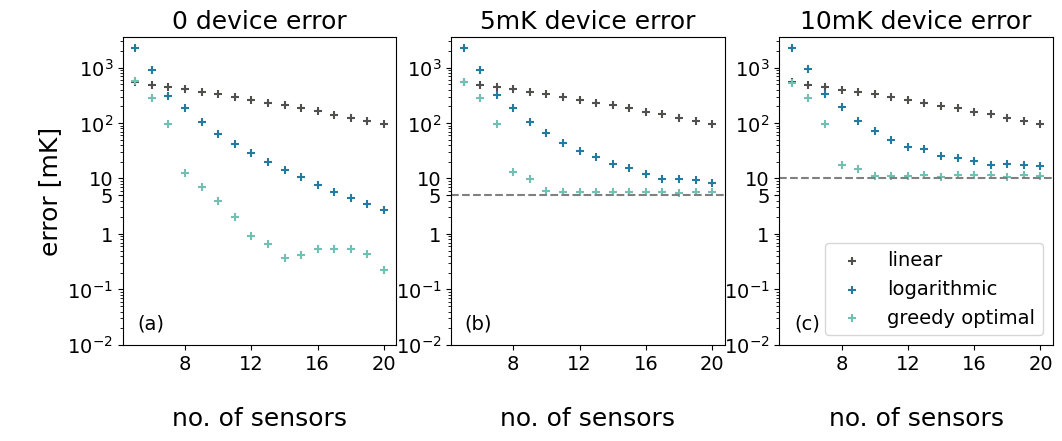

In [27]:
no_sensors_axis=rm_sensors

import matplotlib.pyplot as plt 
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.figure(figsize=(12, 4))

ax1 = plt.subplot2grid((1,3), (0, 0),colspan=1,rowspan=1)
ax1.set_title('0 device error',fontsize=18)
ax1.scatter(no_sensors_axis,GRIP_linear_derr0_plot,c='#50514f',alpha=1,marker='+', label='linear')
ax1.scatter(no_sensors_axis,GRIP_logarithmic_derr0_plot,c='#247ba0',alpha=1,marker='+', label='logarithmic')
ax1.scatter(no_sensors_axis,GRIP_go_avg_derr0_plot,c='#70c1b3',alpha=1,marker='+', label='greedy optimal')
ax1.set_ylabel("\nerror [mK]",fontsize=18)
ax1.set_xlabel("\nno. of sensors",fontsize=18)
ax1.set_yscale('log')
ax1.set_yticks([10**-5,10**-4,10**-3,5*10**-3, 10**-2, 10**-1,10**0,],labels=[r"$10^{-2}$",r"$10^{-1}$",r"1", r"5", r"10",r"$10^{2}$",r"$10^{3}$"])
ax1.set_xticks([8,12,16,20],labels=[r"8",r"12",r"16", r"20"])
ax1.text(0.15, 0.1, '(a)', horizontalalignment='right', verticalalignment='top', transform=ax1.transAxes,fontsize=14)


ax2 = plt.subplot2grid((1,3), (0, 1),colspan=1,rowspan=1, sharey=ax1)
ax2.set_title('5mK device error',fontsize=18)
ax2.scatter(no_sensors_axis,GRIP_linear_derr5mK_plot,c='#50514f',alpha=1,marker='+', label='linear')
ax2.scatter(no_sensors_axis,GRIP_logarithmic_derr5mK_plot,c='#247ba0',alpha=1,marker='+', label='logarithmic')
ax2.scatter(no_sensors_axis,GRIP_go_avg_derr5mK_plot,c='#70c1b3',alpha=1,marker='+', label='greedy optimal')
ax2.set_xlabel("\nno. of sensors",fontsize=18)
ax2.set_yscale('log')
ax2.axhline(y=5*10**-3,color='grey',linestyle='--')
ax2.set_yticks([10**-5,10**-4,10**-3,5*10**-3, 10**-2, 10**-1,10**0,],labels=[r"$10^{-2}$",r"$10^{-1}$",r"1", r"5", r"10",r"$10^{2}$",r"$10^{3}$"])
ax2.set_xticks([8,12,16,20],labels=[r"8",r"12",r"16", r"20"])
ax2.text(0.15, 0.1, '(b)', horizontalalignment='right', verticalalignment='top', transform=ax2.transAxes,fontsize=14)



ax3 = plt.subplot2grid((1,3), (0, 2),colspan=1,rowspan=1,sharey=ax1)
ax3.set_title('10mK device error',fontsize=18)
ax3.scatter(no_sensors_axis,GRIP_linear_derr10mK_plot,c='#50514f',alpha=1,marker='+', label='linear')
ax3.scatter(no_sensors_axis,GRIP_logarithmic_derr10mK_plot,c='#247ba0',alpha=1,marker='+', label='logarithmic')
ax3.scatter(no_sensors_axis,GRIP_go_avg_derr10mK_plot,c='#70c1b3',alpha=1,marker='+', label='greedy optimal')
ax3.set_xlabel("\nno. of sensors",fontsize=18)
ax3.set_yscale('log')
ax3.legend(fontsize=14,loc='lower right')
ax3.axhline(y=10**-2,color='grey',linestyle='--')
ax3.set_yticks([10**-5,10**-4,10**-3,5*10**-3, 10**-2, 10**-1,10**0,],labels=[r"$10^{-2}$",r"$10^{-1}$",r"1", r"5", r"10",r"$10^{2}$",r"$10^{3}$"])
ax3.set_xticks([8,12,16,20],labels=[r"8",r"12",r"16", r"20"])
ax3.text(0.15, 0.1, '(c)', horizontalalignment='right', verticalalignment='top', transform=ax3.transAxes,fontsize=14)




#### Appendix C: Interpolation function

##### Figure C1. The maximum sampling error of exponential and greedy optimal sensor placements with respect to different types of interpolation functions used.

<u>Steps to reproduce plot:</u><br>
Run 'Sensor placements/code/Discussion_interpolation_linear_EDML.py'. <br>
Run 'Sensor placements/code/Discussion_interpolation_quadratic_EDML.py'. <br>
Run 'Sensor placements/code/Discussion_interpolation_cubic_EDML.py'. <br>
Run 'Sensor placements/code/EDML_varying_sensors_5_20_err00.py' (Skip this if it's already run).

In [28]:
EDML_cubicspline_interp_20sensor_0derr_accumulated_error_go_avg=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_accumulated_error_go_avg.npy'%(20))
EDML_cubic_interp_20sensor_0derr_accumulated_error_go_avg=np.load('Sensor placements/output/Discussion/Interpolation_types/EDML_cubic_interp_20sensor_0derr_accumulated_error_go_avg.npy')
EDML_quad_interp_20sensor_0derr_accumulated_error_go_avg=np.load('Sensor placements/output/Discussion/Interpolation_types/EDML_quad_interp_20sensor_0derr_accumulated_error_go_avg.npy')
EDML_linear_interp_20sensor_0derr_accumulated_error_go_avg=np.load('Sensor placements/output/Discussion/Interpolation_types/EDML_linear_interp_20sensor_0derr_accumulated_error_go_avg.npy')

EDML_cubicspline_interp_20sensor_0derr_accumulated_error_logarithmic=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_accumulated_error_logarthmic.npy'%(20))
EDML_cubic_interp_20sensor_0derr_accumulated_error_logarthmic=np.load('Sensor placements/output/Discussion/Interpolation_types/EDML_cubic_interp_20sensor_0derr_accumulated_error_logarthmic.npy')
EDML_quad_interp_20sensor_0derr_accumulated_error_logarthmic=np.load('Sensor placements/output/Discussion/Interpolation_types/EDML_quad_interp_20sensor_0derr_accumulated_error_logarthmic.npy')
EDML_linear_interp_20sensor_0derr_accumulated_error_logarthmic=np.load('Sensor placements/output/Discussion/Interpolation_types/EDML_linear_interp_20sensor_0derr_accumulated_error_logarthmic.npy')

EDML_cubicspline_interp_20sensor_0derr_accumulated_error_linear=np.load('Sensor placements/output/EDML_varying_sensors_5_20/device_error_00mK/EDML_res_%dsensor_0derr_accumulated_error_linear.npy'%(20))
EDML_cubic_interp_20sensor_0derr_accumulated_error_linear=np.load('Sensor placements/output/Discussion/Interpolation_types/EDML_Discussion_cubic_interp_20sensor_0derr_accumulated_error_linear.npy')
EDML_quad_interp_20sensor_0derr_accumulated_error_linear=np.load('Sensor placements/output/Discussion/Interpolation_types/EDML_quad_interp_20sensor_0derr_accumulated_error_linear.npy')
EDML_linear_interp_20sensor_0derr_accumulated_error_linear=np.load('Sensor placements/output/Discussion/Interpolation_types/EDML_linear_interp_20sensor_0derr_accumulated_error_linear.npy')


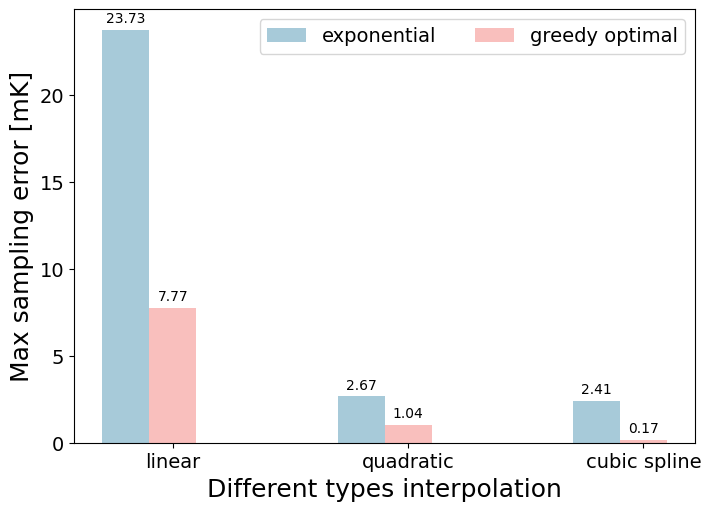

In [29]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

inter = ("linear", "quadratic", "cubic spline")#,"cubic spline")
plcmt_typ_inter_err = {
    'exponential': (np.max(EDML_linear_interp_20sensor_0derr_accumulated_error_logarthmic)*1000, np.max(EDML_quad_interp_20sensor_0derr_accumulated_error_logarthmic)*1000, np.max(EDML_cubicspline_interp_20sensor_0derr_accumulated_error_logarithmic)*1000),

    'greedy optimal': (np.max(EDML_linear_interp_20sensor_0derr_accumulated_error_go_avg)*1000, np.max(EDML_quad_interp_20sensor_0derr_accumulated_error_go_avg)*1000, np.max(EDML_cubicspline_interp_20sensor_0derr_accumulated_error_go_avg)*1000),


}
bar_color={'exponential':'#247ba0',
           'greedy optimal':'#f25f5c'
          }

x = np.arange(len(inter))  # the label locations
width = 0.20  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(7, 5))

for attribute, measurement in plcmt_typ_inter_err.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, np.round(measurement,2), width, label=attribute, color=bar_color[attribute],alpha=0.4)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Max sampling error [mK]', fontsize=18)
ax.set_xlabel('Different types interpolation', fontsize=18)
ax.set_xticks(x + width, inter)
ax.legend(loc='upper right', ncols=3, fontsize=14)


plt.show()

#### Appendix D: Sensor failure test

##### Figure D1. The maximal sampling error observed due to single sensor failure for all the three sensor placement strategies of 11 to 20 sensors.

<u>Steps to reproduce plot:</u><br>
Run 'Sensor placements/code/Response_letter_figures.ipynb' starting from cell 6. <br>

In [30]:
no_of_sensors_included=[11,12,13,14,15,16,17,18,19,20]

max_of_max_err_single_sensor_removal_goa_avg = np.load('Sensor placements/output/Discussion/Sensor_failure_test/max_of_max_err_single_sensor_removal_goa_avg.npy')
max_of_max_err_single_sensor_removal_logarthmic = np.load('Sensor placements/output/Discussion/Sensor_failure_test/max_of_max_err_single_sensor_removal_logarthmic.npy')
max_of_max_err_single_sensor_removal_linear = np.load('Sensor placements/output/Discussion/Sensor_failure_test/max_of_max_err_single_sensor_removal_linear.npy')


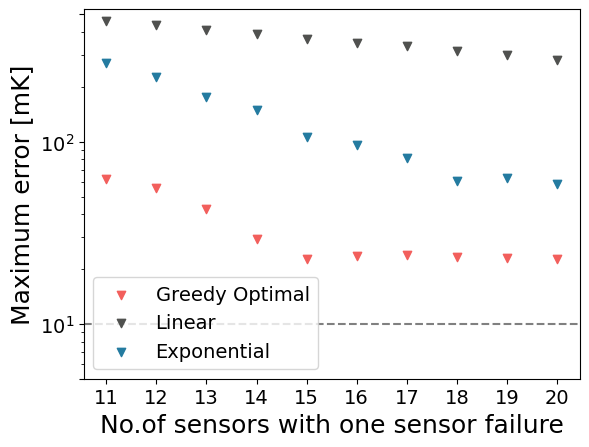

In [31]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.scatter(np.array(no_of_sensors_included),max_of_max_err_single_sensor_removal_goa_avg*1000,c='#f25f5c',marker='v',label='Greedy Optimal')
plt.scatter(np.array(no_of_sensors_included),max_of_max_err_single_sensor_removal_linear*1000,c='#50514f',marker='v',label='Linear')
plt.scatter(np.array(no_of_sensors_included),max_of_max_err_single_sensor_removal_logarthmic*1000,c='#247ba0',marker='v',label='Exponential')

plt.yscale('log')
plt.xticks(no_of_sensors_included)
plt.yticks(
    [5,10, 100,500]
)
plt.xlabel('No.of sensors with one sensor failure', fontsize=18)
plt.ylabel('Maximum error [mK]', fontsize=18)
plt.axhline(y=10**1, color='grey', linestyle='--')
plt.legend( fontsize=14)